In [29]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import mutual_info_score

from code.util import *
from code.preprocessor import *

In [7]:
data = load("data/urls_sampled.pkl")

In [8]:
x = data.url
y = data.target

In [31]:
stop_words = [
    "http",
    "https",
    "www",
    "com",
    "co",
]

In [48]:
vect = CountVectorizer(
    tokenizer=tokenize,
    stop_words=stop_words,
    max_features=6000
)

In [49]:
x0 = vect.fit_transform(x).toarray()

In [50]:
x0.shape

(127284, 6000)

In [51]:
mi = np.array([mutual_info_score(x0[:, i], y) for i in range(x0.shape[1])])

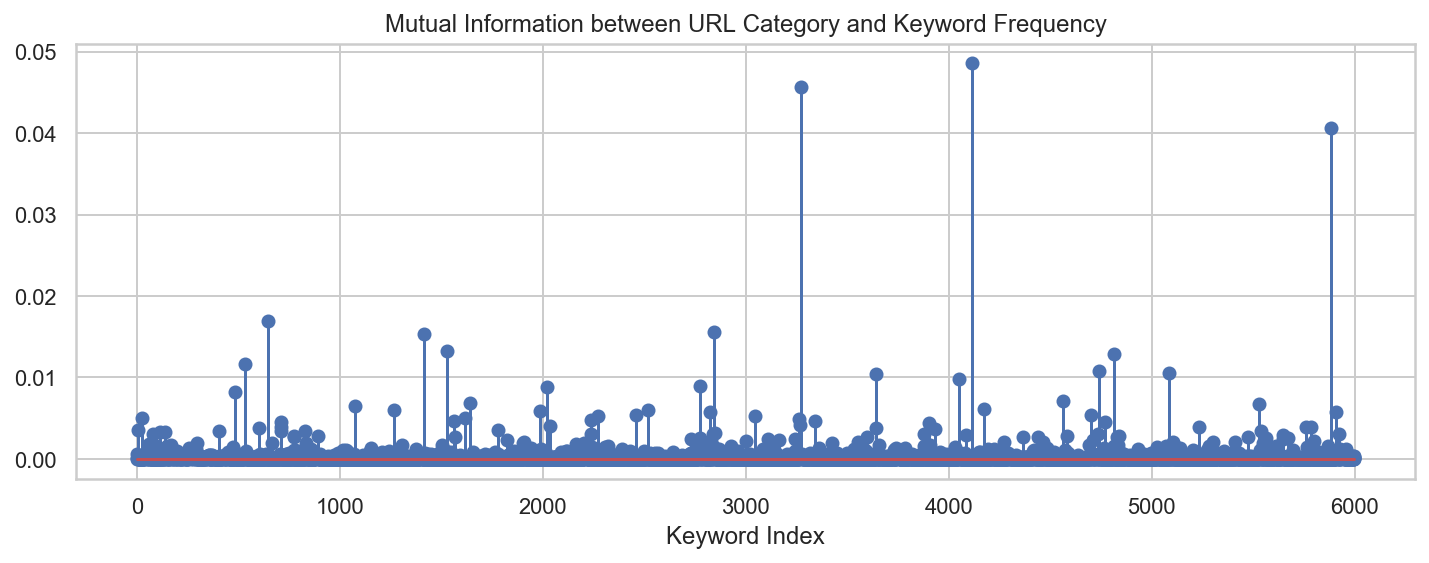

In [52]:
plt.figure(figsize=(12, 4))
plt.title("Mutual Information between URL Category and Keyword Frequency")
plt.xlabel("Keyword Index")
plt.stem(mi)
plt.show()

In [54]:
inv_vocabulary = {v: k for k, v in vect.vocabulary_.items()}
idx = np.flip(np.argsort(mi))
words = [inv_vocabulary[idx[i]] for i in range(50)]
pprint(words)

['php',
 'login',
 'wp',
 'amp',
 'includes',
 'cmd',
 'content',
 'signin',
 'admin',
 'session',
 'submit',
 'myaccount',
 'paypal',
 'id',
 'email',
 'account',
 'ru',
 'customer',
 'update',
 'br',
 'plugins',
 'google',
 'center',
 'edu',
 'x',
 'images',
 'secure',
 'geocities',
 'firebaseapp',
 'js',
 '1',
 'css',
 'locale',
 'file',
 'country',
 'mail',
 'sharepoint',
 'apple',
 'onedrive',
 'log',
 'en',
 'app',
 'themes',
 'websc',
 'wdformid',
 'alibaba',
 'my',
 'org',
 'dhl',
 '000webhostapp']
